##Regresión Lineal: Publicidad y Ventas

Este proyecto implementa un modelo de **regresión lineal simple** para analizar la relación entre la inversión en publicidad y las ventas de una empresa.

Herramientas utilizadas:
- Python (NumPy, Pandas, Matplotlib, Scikit-learn, Statsmodels, Scipy)


PROGRAMA PARA UNA REGRESION LINEAL SIMPLE PARA ESTIMAR EL AUMENTO DE LAS VENTAS EN RELACION A LA PUBLICIDAD
Introduce los datos para las variables.
¿CUANTAS VARIABLES INDEPENDIENTES? (VALORES DE X): 10
INGRESA LOS DATOS DE PUBLICIDAD
Introduce los valores de publicidad (X) para (separados por espacio): 1 2 3 4 5 6 7 8 9 10
INGRESA LOS DATOS DE VENTAS
Introduce los valores de las ventas (Y) (separados por espacio): 24 56 78 89 90 100 120 140 150 200

Resumen de la regresión lineal:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.36e-06
Time:                        22:18:24   Log-Likelihood:                -38.661
No. Observations:                  10   

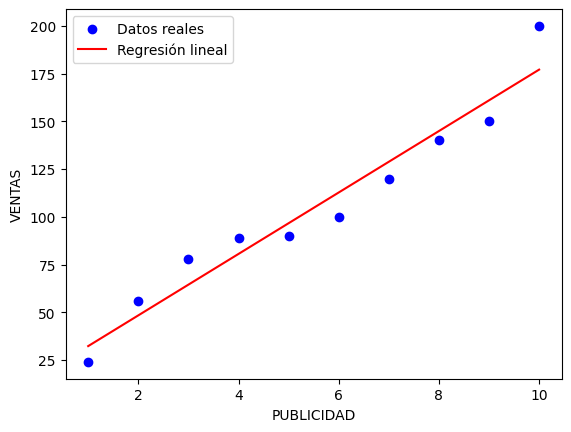

In [1]:
#1. Importación de bibiliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

#2. Función para obtener los datos de la regresión
print("PROGRAMA PARA UNA REGRESION LINEAL SIMPLE PARA ESTIMAR EL AUMENTO DE LAS VENTAS EN RELACION A LA PUBLICIDAD")
def obtener_datos():
    print("Introduce los datos para las variables.")
    # Establecer el número de variables
    n = int(input("¿CUANTAS VARIABLES INDEPENDIENTES? (VALORES DE X): "))

    print("INGRESA LOS DATOS DE PUBLICIDAD")
    X_vector = list(map(float, input("Introduce los valores de publicidad (X) para (separados por espacio): ").split()))
    X_vector = [[x] for x in X_vector]

    print("INGRESA LOS DATOS DE VENTAS")
    Y_vector = list(map(float, input("Introduce los valores de las ventas (Y) (separados por espacio): ").split()))

    X = pd.DataFrame(X_vector, columns=['X1'])
    Y = pd.Series(Y_vector, name='Y')
    return X, Y


#3. Preparación y ajuste del modelo
X, Y = obtener_datos()

modelo = LinearRegression()
X_np = X.to_numpy()
Y_np = Y.to_numpy()

if X_np.shape[1] == 1:
    X_np = X_np.reshape(-1, 1)

Y_np = Y_np.reshape(-1, 1)
modelo.fit(X_np, Y_np)

#4. Funciones para análisis estadistico
#Regresión lineal
def regresion_lineal(X, Y):
    X = sm.add_constant(X)
    modelo=sm.OLS(Y, X).fit()
    print("\nResumen de la regresión lineal:")
    print(modelo.summary())
    return modelo

# Análisis de multicolinealidad
def prueba_multicolinealidad(X):
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nPrueba de Multicolinealidad (VIF):")
    print(vif_data)
    return vif_data

# Prueba de heterocedasticidad
def prueba_heteroscedasticidad(modelo, X):
    y_pred = modelo.predict(X.to_numpy())
    residuos = Y - y_pred.flatten()
    pruebas = het_breuschpagan(residuos, X)
    bp_statistic = pruebas[0]
    p_value = pruebas[1]

    print("\nPrueba de Heterocedasticidad (Breusch-Pagan):")
    print(f'Estadístico BP: {bp_statistic:.4f}, p-valor: {p_value:.4f}')

    if p_value < 0.05:
        print("Existe heterocedasticidad.")
    else:
        print("No se encuentra heterocedasticidad.")

    return bp_statistic, p_value

# Prueba de normalidad
def prueba_normalidad(residuos):
    estadistico, p_value = shapiro(residuos)
    print("\nPrueba de Normalidad (Shapiro-Wilk):")
    print(f'Estadístico: {estadistico:.4f}, p-valor: {p_value:.4f}')

    if p_value < 0.05:
        print("Los residuos no siguen una distribución normal.")
    else:
        print("Los residuos siguen una distribución normal.")

    return estadistico, p_value

# Prueba de autocorrelación
def prueba_autocorrelacion(residuos):
    dw_statistic = durbin_watson(residuos)
    print("\nPrueba de Autocorrelación (Durbin-Watson):")
    print(f'Estadístico Durbin-Watson: {dw_statistic:.4f}')

    if dw_statistic < 1.5:
        print("Posible autocorrelación positiva.")
    elif dw_statistic > 2.5:
        print("Posible autocorrelación negativa.")
    else:
        print("No se detecta autocorrelación.")

    return dw_statistic

#5. Ejecución principal
def main():
    # Realizar la regresión lineal
    modelo = regresion_lineal(X, Y)

    # Prueba de multicolinealidad (VIF)
    prueba_multicolinealidad(X)

    # Prueba de heteroscedasticidad
    prueba_heteroscedasticidad(modelo, sm.add_constant(X))

    # Prueba de normalidad (Shapiro-Wilk)
    prueba_normalidad(modelo.resid)

    # Prueba de autocorrelación (Durbin-Watson)
    prueba_autocorrelacion(modelo.resid)

if __name__ == "__main__":
    main()

#6. GRAFICA DE LA REGRESION
plt.xlabel('PUBLICIDAD')
plt.ylabel('VENTAS')
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, modelo.predict(X_np), color='red', label='Regresión lineal')
plt.legend()
plt.show()


#7. CONCLUSIÓN: Con los datos empleados en las variables de publicidad y ventas se comprobó que hay una autocorrelación positiva, la muestra sigue una distribución normal y no se encuentra heterocedasticidad. A mayor aumento en la publicidad existe un mayor alcance en posibles clientes y por lo tanto mayores ventas. Por lo tanto, este modelo de regresión es adecuado para predecir las ventas a partir de la inversión en publicidad, mientras que un mal ajuste sugeriría que otros factores podrían estar influyendo sobre las ventas además de la publicidad